<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/surface_generation_andwulffconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://matgenb.materialsvirtuallab.org/2017/04/03/Slab-generation-and-Wulff-shape.html

In [27]:
!pip install pymatgen


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


이건 wulff construction 예시

In [28]:
# Import the necessary tools for making a Wulff shape
from pymatgen.analysis.wulff import WulffShape

# Import the necessary tools to generate surfaces
from pymatgen.core.surface import Lattice, SlabGenerator, Structure, generate_all_slabs

# Let's start with fcc Ni
lattice = Lattice.cubic(3.508)
Ni = Structure(
    lattice,
    ["Ni", "Ni", "Ni", "Ni"],
    [[0, 0, 0], [0, 0.5, 0], [0.5, 0, 0], [0, 0, 0.5]],
)


# We'll use the SlabGenerator class to get a single slab. We'll start with the
# (111) slab of Ni. Plug in the CONVENTIONAL unit cell of your structure, the
# maximum Miller index value to generate the different slab orientations along
# with the minimum slab and vacuum size in Angstroms
slabgen = SlabGenerator(Ni, (1, 1, 1), 10, 10)

# If we want to find all terminations for a particular Miller index orientation,
# we use the get_slabs() method. This returns a LIST of slabs rather than a single
# slab. When generating a slab for a particular orientation, there are sometimes
# more than one location we can terminate or cut the structure to create a slab. The
# simplest example of this would be the Si(Fd-3m) (111) slab which can be cut or
# terminated in two different locations along the vector of the Miller index. For a
# fcc structure such as Ni however, there should only be one way to cut a (111) slab.
all_slabs = slabgen.get_slabs()
print("The Ni(111) slab only has %s termination." % (len(all_slabs)))


The Ni(111) slab only has 1 termination.


shape factor: 5.178, anisotropy: 0.070, weighted surface energy: 2.035 J/m^2


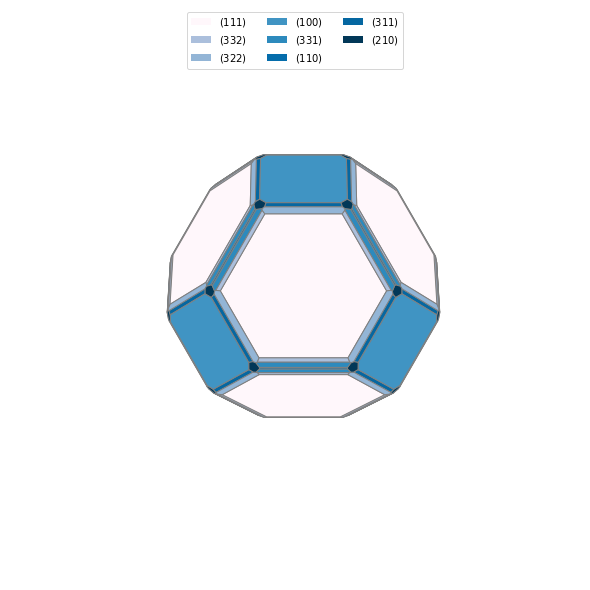

In [29]:
# Now let's assume that we then calculated the surface energies for these slabs

# Surface energy values in J/m^2
surface_energies_Ni = {
    (3, 2, 0): 2.3869,
    (1, 1, 0): 2.2862,
    (3, 1, 0): 2.3964,
    (2, 1, 0): 2.3969,
    (3, 3, 2): 2.0944,
    (1, 0, 0): 2.2084,
    (2, 1, 1): 2.2353,
    (3, 2, 2): 2.1242,
    (3, 2, 1): 2.3183,
    (2, 2, 1): 2.1732,
    (3, 3, 1): 2.2288,
    (3, 1, 1): 2.3039,
    (1, 1, 1): 1.9235,
}
miller_list = surface_energies_Ni.keys()
e_surf_list = surface_energies_Ni.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(Ni.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print(
    "shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2"
    % (
        wulffshape.shape_factor,
        wulffshape.anisotropy,
        wulffshape.weighted_surface_energy,
    )
)


# If we want to see what our Wulff shape looks like
wulffshape.show()

In [43]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.core.surface import Lattice, SlabGenerator, Structure, generate_all_slabs
from pymatgen.io.vasp.inputs import Poscar


##########Bulk 넣기############
structure = Structure.from_file("/content/Ti4O7.vasp")

##########자를 표면의miller index 넣기############
'''slabgen_121 = SlabGenerator(structure, (1, 2, 1), 10, 15) #miller, min-slab size, vaccum size in angstroms
all_slabs_121 = slabgen_121.get_slabs()
print("The Ti4O7(121) slab only has %s termination." % (len(all_slabs_121)))
n=0
for slabs in all_slabs_121:
    open('z'+str(n+1)+'POSCAR', 'w').write(str(Poscar(slabs)))
    n=n+1'''
##########자를 표면의miller index 넣기############
slabgen_101 = SlabGenerator(structure, (1, 0, 1), 10, 10) #miller, min-slab size, vaccum size in angstroms
all_slabs_101 = slabgen_101.get_slabs()
print("The Ti4O7(101) slab only has %s termination." % (len(all_slabs_101)))
for slabs in all_slabs_101:
    open(str(n+1)+'_101_'+'POSCAR', 'w').write(str(Poscar(slabs)))
    n=n+1



The Ti4O7(101) slab only has 8 termination.


In [44]:
##########자를 표면의miller index 넣기############
slabgen_120 = SlabGenerator(structure, (1, 2, 0), 10, 15) #miller, min-slab size, vaccum size in angstroms
all_slabs_120 = slabgen_120.get_slabs()
print("The Ti4O7(120) slab only has %s termination." % (len(all_slabs_120)))
for slabs in all_slabs_120:
    open(str(n+1)+'_120_'+'POSCAR', 'w').write(str(Poscar(slabs)))
    n=n+1

The Ti4O7(120) slab only has 7 termination.


In [42]:
!rm *_*

rm: cannot remove 'sample_data': Is a directory


In [45]:
from google.colab import files

for f in range(13,21):
    files.download(str(f)+'_101_'+'POSCAR')
for f in range(21,28):
    files.download(str(f)+'_120_'+'POSCAR')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>